In [1]:

import numpy as np
# from helpers import get_data
# from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [2]:
gen1x = "Gen10"
# gen2x = "Gen11"
df1 = get_data(gen=gen1x)
# df2 = get_data(gen=gen2x)
df1["Gen"] = gen1x
# df2["Gen"] = gen2x
df = pd.concat([df1, 
#                 df2
               ])
len(df)

2910

In [3]:
# df1 = get_data(gen="Gen1")
# df3 = get_data(gen="Gen3")
# df4 = get_data(gen="Gen4")
# df6 = get_data(gen="Gen6")

# df1["Gen"] = "Gen1"
# df3["Gen"] = "Gen3"
# df4["Gen"] = "Gen4"
# df6["Gen"] = "Gen6"
# df = pd.concat([df1, df3, df4, df6])

# Index names
df['Name'] = df['Gen'] + "/" + df.index
df = df.set_index('Name')

In [42]:
list(df)

['BIAS-d13C-blk',
 'NSE-CONC-tot',
 'NSE-CONC-tra',
 'f_evap',
 'NSE-CONC-blk',
 'BIAS-CONC-blk',
 'KGE-d13C-det',
 'KGE-d13C-blk',
 'BIAS-d13C-tra',
 'cZ0Z1',
 'dt_50_aged',
 'KGE-d13C_out',
 'NSE-d13C-det',
 'f_transp',
 'NSE-d13C_out',
 'MAE-LDS_out',
 'KGE-CONC-blk',
 'BIAS-d13C-det',
 'MAE-CONC_out',
 'BIAS-CONC-tot',
 'cZ',
 'KGE-CONC_out',
 'KGE-CONC-det',
 'BIAS-CONC-tra',
 'dt_50_ref',
 'MAE-d13C-tot',
 'BIAS-d13C_out',
 'MAE-CONC-blk',
 'dt_50_ab',
 'NSE-LDS_out',
 'NSE-d13C-tra',
 'NSE-d13C-blk',
 'MAE-d13C-det',
 'k_oc',
 'z3_factor',
 'BIAS-Q_out',
 'beta_runoff',
 'KGE-d13C-tot',
 'KGE-d13C-tra',
 'KGE-CONC-tot',
 'BIAS-CONC-det',
 'BIAS-CONC_out',
 'BIAS-LDS_out',
 'KGE-CONC-tra',
 'BIAS-d13C-tot',
 'NSE-CONC_out',
 'Model',
 'MAE-d13C-tra',
 'f_oc',
 'MAE-d13C-blk',
 'MAE-CONC-tra',
 'MAE-CONC-tot',
 'KGE-Q_out',
 'gammaZ',
 'NSE-d13C-tot',
 'c_adr',
 'KGE-LDS_out',
 'MAE-CONC-det',
 'NSE-CONC-det',
 'gamma01',
 'MAE-Q_out',
 'NSE-Q_out',
 'epsilon_iso',
 'MAE-d13C_out'

In [5]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 'Gen',
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'f_evap',
          'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-CONC-tra', 'KGE-d13C-tra',
          'KGE-CONC-blk', 'KGE-d13C-blk',
          'KGE-CONC-det', 'KGE-d13C-det',
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-d13C_out',
          'MAE-CONC_out', 'MAE-d13C_out',
          'NSE-CONC_out', 'NSE-Q_out',
          'BIAS-CONC_out', 'BIAS-d13C_out',
          'BIAS-LDS_out',
          'BIAS-Q_out'
          ]]

In [6]:
dfs['KGE-SM'] = (dfs.loc[:, 'KGE-CONC_out'] + dfs.loc[:, 'KGE-CONC-blk'])/2.0  
dfs['KGE-d13C'] = (dfs.loc[:, 'KGE-d13C_out'] + dfs.loc[:, 'KGE-d13C-blk'])/2.0
dfs['k_d'] = dfs.loc[:, 'k_oc'] * dfs.loc[:,'f_oc']
# dfs['KGE-CONC_out'].max()
dfs['KGE-CONC-blk'].max()
# dfs['KGE-SM'].max()
# dfs['KGE-d13C_out'].max()
# dfs['NSE-Q_out' ].max()
dfs['KGE-CONC_out'].max()
# dfs['BIAS-LDS_out'].min()
# dfs['BIAS-d13C_out'].max()

0.483226275596356

In [7]:
# ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0) &(dfs['KGE-CONC_out'] > 0) & (dfs['KGE-d13C_out'] > 0) ] # Outlet
# ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0) &(dfs['KGE-CONC-blk'] > .7) & (dfs['KGE-d13C-blk'] > .8) ] # Soils
dfs = dfs.loc[(dfs['Model'] == 'var')] 
ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0.5) &(dfs['KGE-CONC-blk'] > .5) & (dfs['KGE-d13C-blk'] > .0)] # Soils

print(len(ff_out))

215


In [8]:
ff_out.head()

,Model,Gen,z3_factor,cZ0Z1,cZ,c_adr,k_g,gamma01,gammaZ,f_transp,...,MAE-d13C_out,NSE-CONC_out,NSE-Q_out,BIAS-CONC_out,BIAS-d13C_out,BIAS-LDS_out,BIAS-Q_out,KGE-SM,KGE-d13C,k_d
Name,,,,,,,,,,,,,,,,,,,,,
Gen10/LHS_be1var61/19/,var,Gen10,0.986933,0.677059,0.491685,0.337347,2990.624877,0.591744,0.392017,0.959805,...,1.237522,-0.078974,0.398111,-78.489018,-0.198830,-41.164710,-34.292319,0.129920,0.016057,46.840146
Gen10/LHS_be1var61/21/,var,Gen10,0.960759,0.250539,0.274745,0.015766,1862.583691,0.175163,0.324033,0.770184,...,1.261543,-1.398410,0.214917,28.342931,-2.268372,332.548258,-22.203620,0.352415,0.171120,65.743089
Gen10/LHS_be1var61/23/,var,Gen10,0.964467,0.329024,0.392358,0.320531,2026.908827,0.784307,0.430600,0.436001,...,3.136453,-0.596177,0.330723,-32.064092,-7.504182,143.570371,21.265547,0.424150,-0.924294,28.241252
Gen10/LHS_be1var61/28/,var,Gen10,0.928880,0.453524,0.539274,0.183470,3184.944610,0.653655,0.763779,0.714869,...,3.218876,-0.933973,0.333924,0.638880,-10.243197,206.075120,-26.226395,0.512553,-0.761996,3.429824
Gen10/LHS_be1var61/29/,var,Gen10,0.903533,0.017473,0.226590,0.091303,1559.505942,0.051830,0.647114,0.992135,...,2.177724,-0.357397,0.288855,-23.254079,-6.314726,184.972532,5.893493,0.526118,-0.301554,82.537069


In [9]:
# ff_out['IsoCstr'] = ff_out.apply(IsoKGEout, args=(0.2,), axis=1)
ff_out['BlkIso'] = ff_out.apply(BlkIso, args=(0.7,), axis=1)
ff_out['TraIso'] = ff_out.apply(TraIso, args=(0.7,), axis=1)
ff_out['DetIso'] = ff_out.apply(DetIso, args=(0.7,), axis=1)

In [10]:
dm_simp = pd.melt(ff_out, 
                 id_vars=['KGE-SM', 'KGE-d13C', 'KGE-CONC-blk',  'KGE-CONC-tra', 'KGE-CONC-det', 
                          'KGE-d13C-blk', 'KGE-d13C-tra', 'KGE-d13C-det',
                          'BIAS-Q_out', 'BIAS-d13C_out','BIAS-CONC_out', 'BIAS-LDS_out',
                          'NSE-Q_out',
                          'MAE-d13C_out', 'MAE-CONC_out', 
                          'KGE-d13C_out','KGE-CONC_out', 'KGE-Q_out',
                          'Gen',  'Model', 'NSE-CONC_out', 
                          'BlkIso', 'TraIso', 'DetIso', 
                         ],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'f_evap',
                         'f_oc',
                         'k_oc',
                         'k_d',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

In [11]:
dm_simp.head()

,KGE-SM,KGE-d13C,KGE-CONC-blk,KGE-CONC-tra,KGE-CONC-det,KGE-d13C-blk,KGE-d13C-tra,KGE-d13C-det,BIAS-Q_out,BIAS-d13C_out,...,KGE-CONC_out,KGE-Q_out,Gen,Model,NSE-CONC_out,BlkIso,TraIso,DetIso,variable,value
0,0.129920,0.016057,0.515954,0.542590,0.698590,0.651766,0.723121,0.823654,-34.292319,-0.198830,...,-0.256115,0.530151,Gen10,var,-0.078974,NC,WC,WC,z3_factor,0.986933
1,0.352415,0.171120,0.615427,0.638007,0.765486,0.932621,0.729483,0.376446,-22.203620,-2.268372,...,0.089403,0.582383,Gen10,var,-1.398410,WC,WC,NC,z3_factor,0.960759
2,0.424150,-0.924294,0.594594,0.491273,0.695504,0.721568,-0.020147,-0.836836,21.265547,-7.504182,...,0.253707,0.555369,Gen10,var,-0.596177,WC,NC,NC,z3_factor,0.964467
3,0.512553,-0.761996,0.779218,0.784498,0.857440,0.266944,-0.322757,-1.243059,-26.226395,-10.243197,...,0.245889,0.565267,Gen10,var,-0.933973,NC,NC,NC,z3_factor,0.928880
4,0.526118,-0.301554,0.755196,0.791797,0.863722,0.088784,-0.560038,-1.357451,5.893493,-6.314726,...,0.297040,0.645758,Gen10,var,-0.357397,NC,NC,NC,z3_factor,0.903533


## Overall

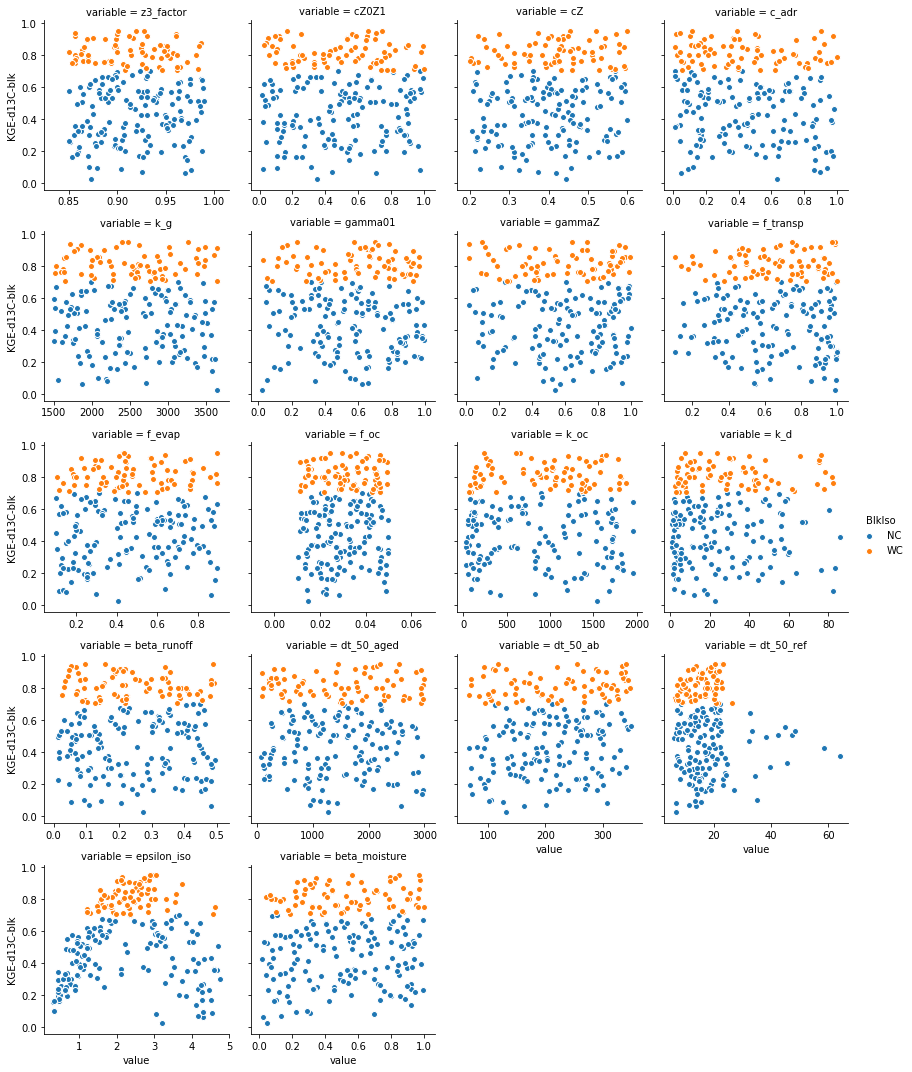

In [12]:
g = sns.FacetGrid(dm_simp, col="variable", hue="BlkIso", col_wrap=4, sharex=False)
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-d13C-blk', edgecolor="w").add_legend()

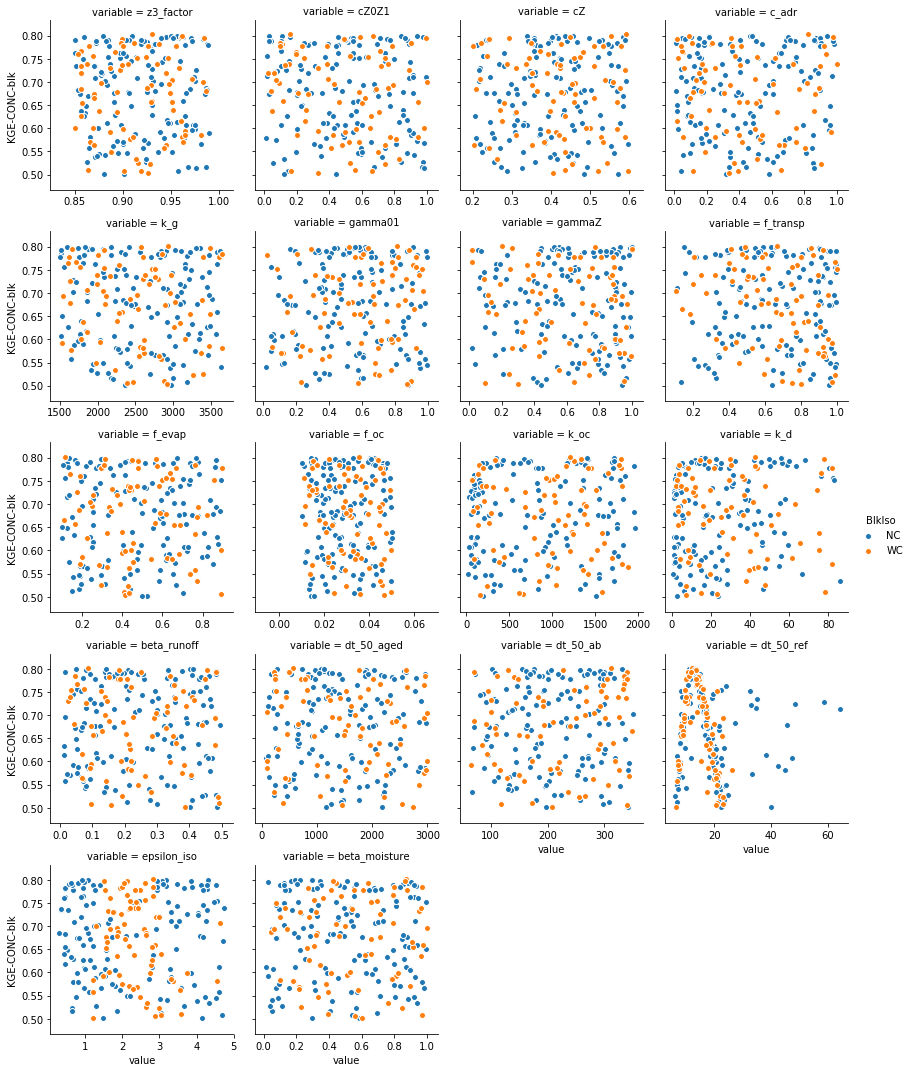

In [13]:
g = sns.FacetGrid(dm_simp, col="variable", hue="BlkIso", col_wrap=4, sharex=False)
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-CONC-blk', edgecolor="w").add_legend()

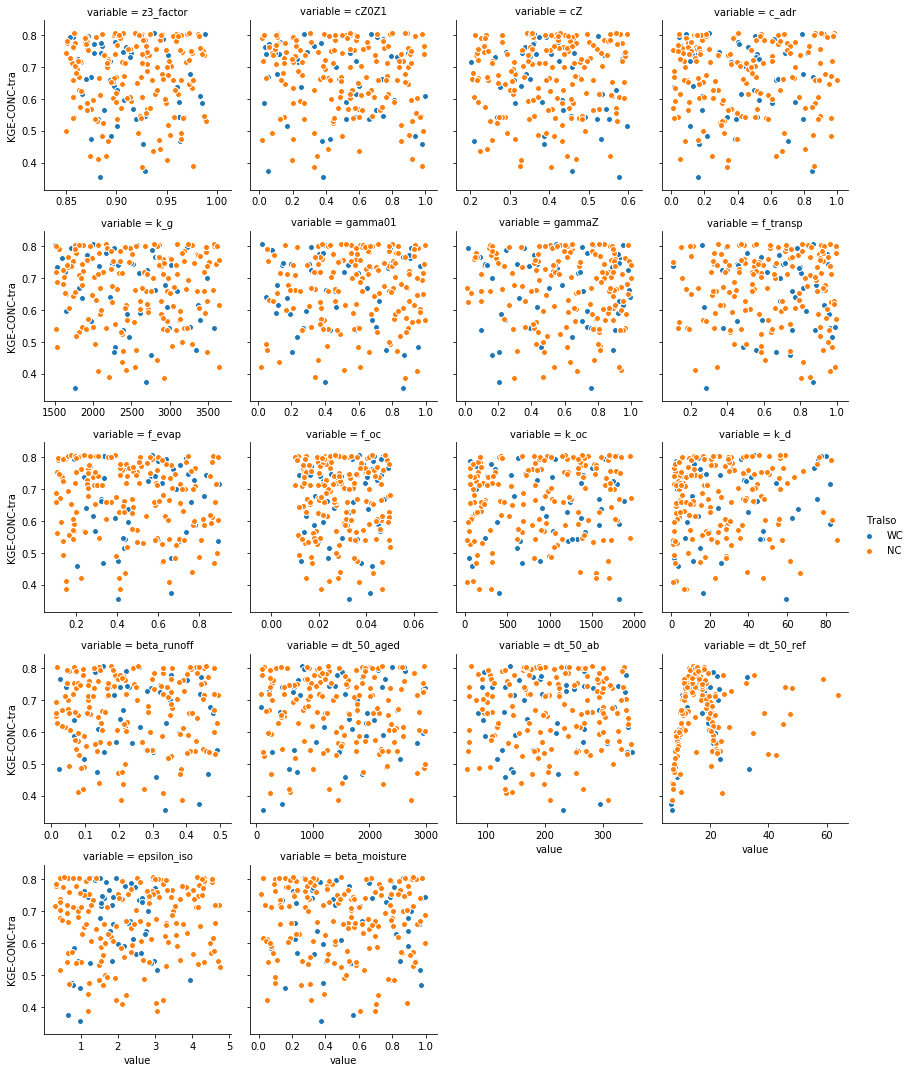

In [14]:
g = sns.FacetGrid(dm_simp, col="variable", hue="TraIso", col_wrap=4, sharex=False)
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-CONC-tra', edgecolor="w").add_legend()

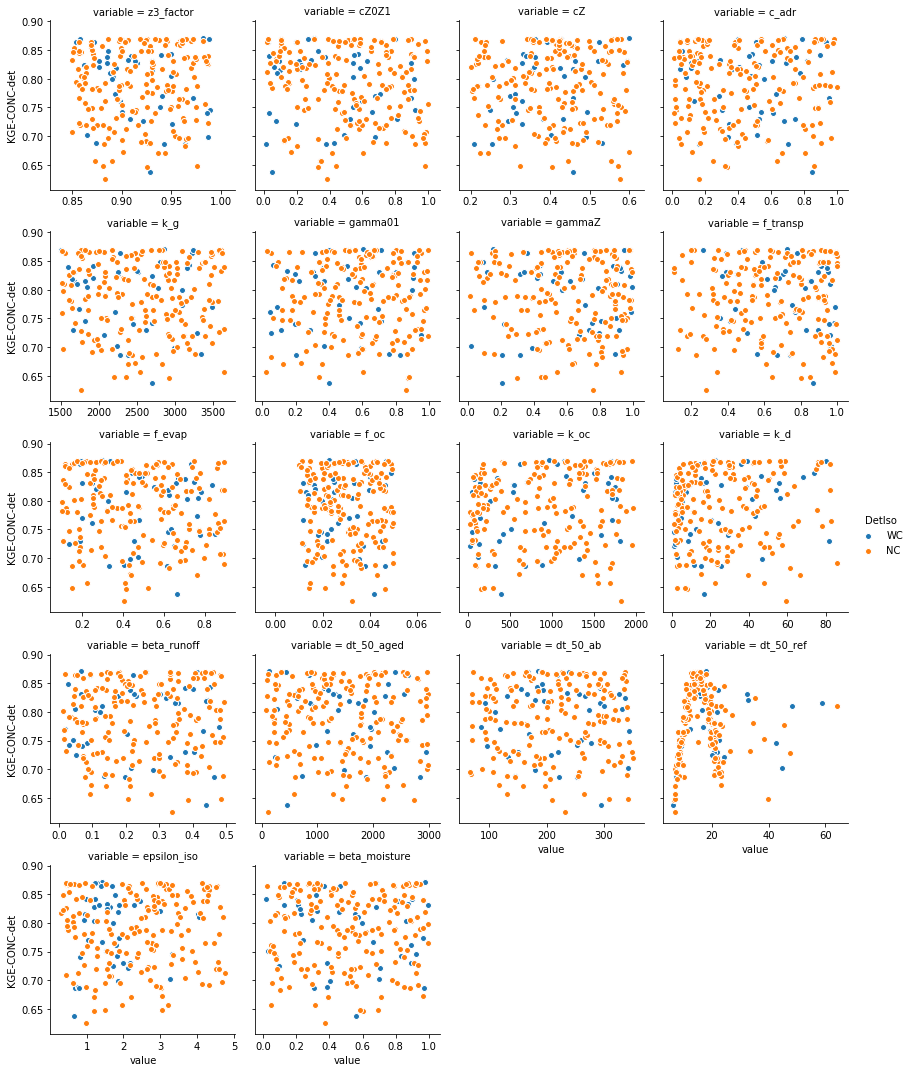

In [15]:
g = sns.FacetGrid(dm_simp, col="variable", hue="DetIso", col_wrap=4, sharex=False)
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-CONC-det', edgecolor="w").add_legend()

In [16]:
# g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
# # g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
# g = g.map(plt.scatter, "value", "KGE-d13C", edgecolor="w").add_legend()

## Outlet, fix vs. var

In [ ]:
g = sns.FacetGrid(dm_simp, col="variable", hue="IsoCstr", col_wrap=4, sharex=False)
# g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-d13C_out", edgecolor="w").add_legend()

In [ ]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-CONC_out", edgecolor="w").add_legend()

In [ ]:
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
# g = g.map(plt.scatter, "value", "BIAS-d13C_out", edgecolor="w").add_legend()

In [ ]:
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
# g = g.map(plt.scatter, "value", "MAE-d13C_out", edgecolor="w").add_legend()

In [ ]:
# g = sns.FacetGrid(dm_simp, col="variable", hue="Gen", col_wrap=4, sharex=False)
# g = g.map(plt.scatter, "value", "BIAS-CONC_out", edgecolor="w").add_legend()

In [ ]:
# g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
# g = g.map(plt.scatter, "value", "BIAS-Q_out", edgecolor="w").add_legend()

In [ ]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "KGE-Q_out", edgecolor="w").add_legend()

In [ ]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", "NSE-Q_out", edgecolor="w").add_legend()

In [ ]:
np.log(2)/2000.

In [ ]:
np.log(2)/100.

## Fit d13C, 1:1

In [17]:
path = '../phd-model-process/'
obs_d13c = pd.read_table(path + 'observations/d13c_out_cal.tss')
obs_conc = pd.read_table(path + 'observations/conc_out_cal.tss')
obs_d13c.head()

,Jdays,d13C
0,183,-31.518176
1,189,-31.185525
2,190,-31.280000
3,198,-30.966667
4,199,-30.916045


In [18]:
# ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0) &(dfs['KGE-CONC_out'] > 0) & (dfs['KGE-d13C_out'] > -1.33) ] #
# ff_out = dfs.loc[(dfs['KGE-Q_out'] > .5) &(dfs['KGE-CONC_out'] > .25) & (dfs['KGE-d13C_out'] > .4) ] #
ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0.5) &(dfs['KGE-CONC-blk'] > .79) & (dfs['KGE-d13C-blk'] > .87)] # Soils
var_list = ff_out.index[(ff_out['Model'] == 'var')].tolist() #[0]
# var_list = ff_out.index.tolist() #[0]
len(var_list)

1

,z3_factor,cZ0Z1,cZ,c_adr,k_g,gamma01,gammaZ,f_transp,f_evap,f_oc,k_oc,beta_runoff,dt_50_aged,dt_50_ab,dt_50_ref,epsilon_iso,beta_moisture
Name,,,,,,,,,,,,,,,,,
Gen10/LHS_be1var62/18/,0.956967,0.925914,0.571277,0.646355,3501.537627,0.48139,0.415844,0.670898,0.172275,0.023884,427.155876,0.122256,2060.4919,324.201768,36.212589,4.281754,0.791414


In [41]:
var_list
ff_out.loc[(ff_out['Model'] == 'var')]['dt_50_ref']

Name
Gen10/LHS_be1var62/18/    36.212589
Name: dt_50_ref, dtype: float64

In [84]:
d13c = get_sets(var_list, path, 'resM_outISO_d13C.tss', "out-d13C")
# d13c = get_sets(var_list, path, 'resM_outISO_ROFF_d13C.tss', "out-d13C")
# d13c = get_sets(var_list, path, 'resM_outISO_LF_d13C.tss', "out-d13C")
# d13c = get_sets(var_list, path, 'resM_outISO_ADR_d13C.tss', "out-d13C")

In [85]:
d13c_merged = pd.merge(d13c, obs_d13c, how='inner', on='Jdays')
d13c_merged.head(2)

,Jdays,out-d13CS_sc3var61/24/,d13C
0,183,-31.7602,-31.518176
1,189,-31.3442,-31.185525


In [86]:
203-171
# 198-171

32

In [87]:
time = np.array(d13c_merged['Jdays'])
obs = np.array(d13c_merged['d13C'])

x = np.arange(d13c_merged['d13C'].min()-1, 
              d13c_merged['d13C'].max()+5, 0.2) 
y = x
sims = []

for i in range(1, len(np.array(d13c_merged.iloc[0, 1:]))):
    arr = np.array(d13c_merged.iloc[:, i])
    arr[arr > 0.99] = np.nan
    sims.append(arr)


<IPython.core.display.Javascript object>


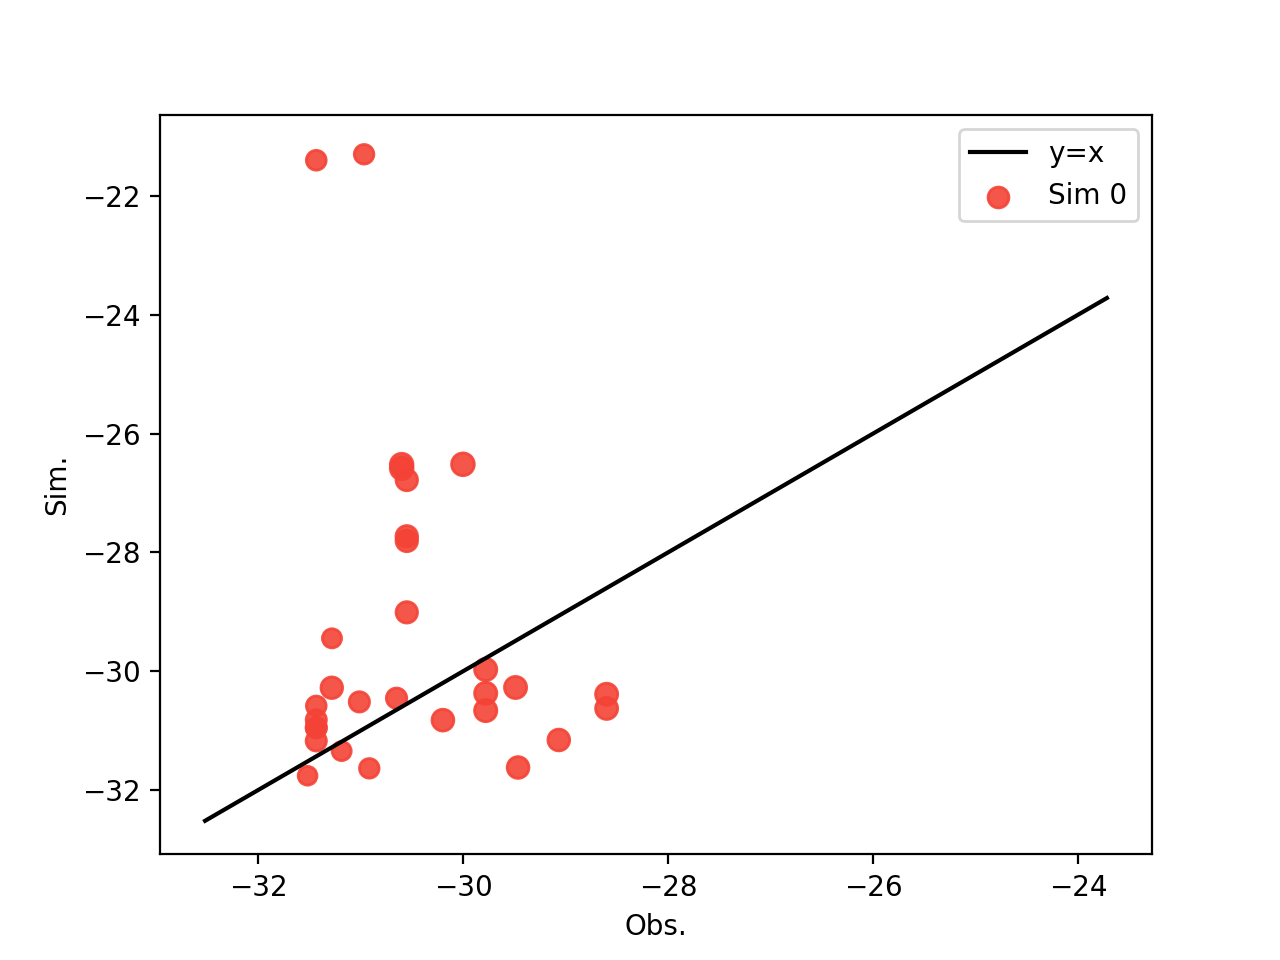

Text(0,0.5,'Sim.')

In [88]:
palette = ["#F44336", '#673AB7', '#3F51B5', '#009688', '#FF9800', '#4CAF50', '#03A9F4']
# red, purple, indigo, teal-green, orange, green, light-blue
# https://matplotlib.org/users/dflt_style_changes.html

fig = plt.figure()

ax1 = plt.subplot(111) 

ax1.plot(x, y, label='y=x', c= "black")
for i in range(len(sims)):
    ax1.scatter(obs, sims[i], c= palette[i], marker='.', s=time,
                label="Sim "+ str(i), alpha=.9)
ax1.legend() 
ax1.set_xlabel("Obs.")
ax1.set_ylabel("Sim.")

In [71]:
%matplotlib notebook

<IPython.core.display.Javascript object>


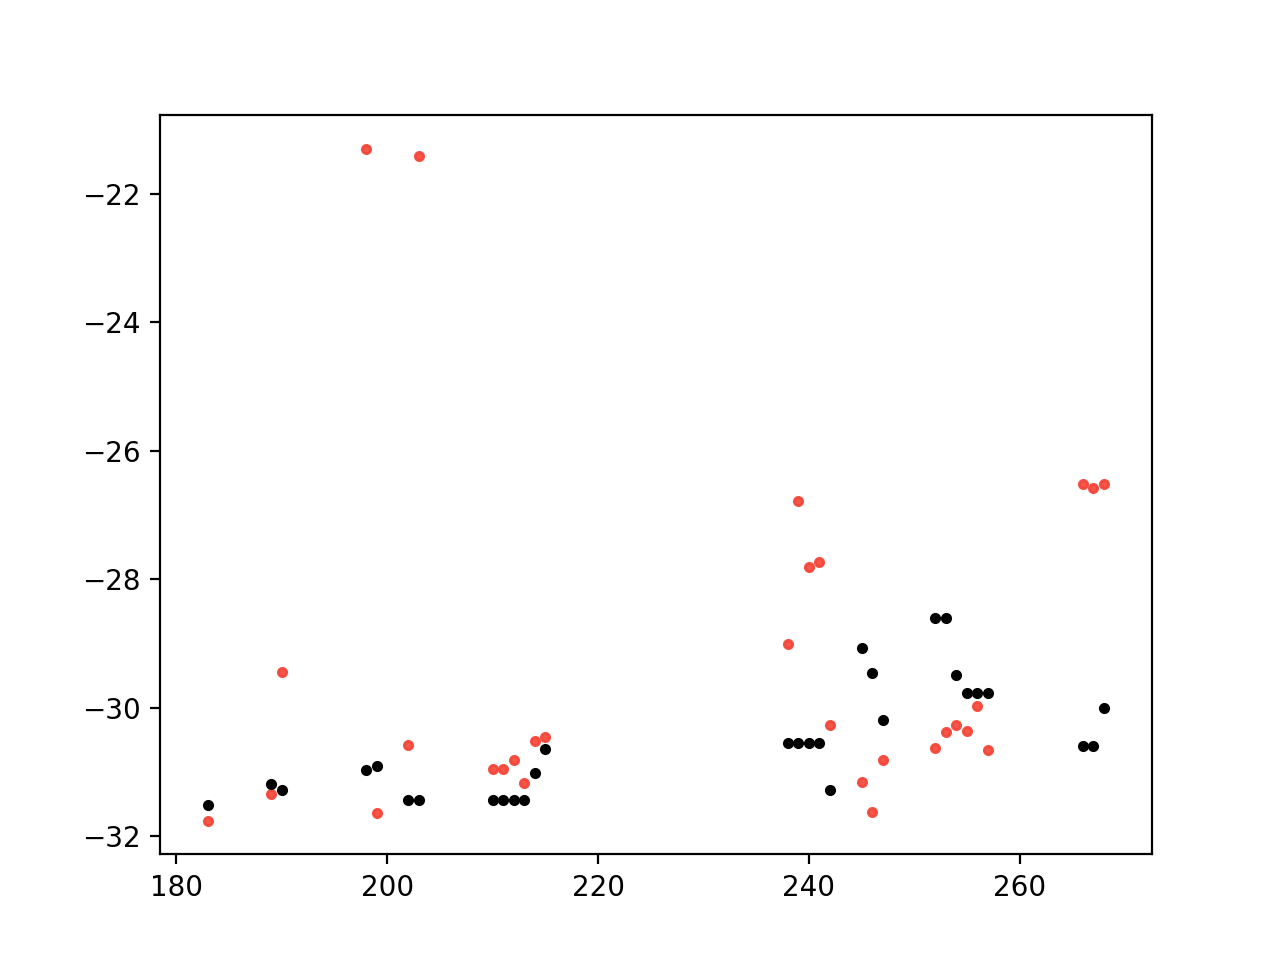

In [89]:
fig = plt.figure()

ax1 = plt.subplot(111) 

for i in range(len(sims)):
    ax1.scatter(time, sims[i], c= palette[i], marker='.', # s=time,
                label="Sim "+ str(i), alpha=.9)
ax1.scatter(time, obs, c= 'black', marker='.', # s=time,
                label="Obs")

In [80]:
conc = get_sets(var_list, path, 'resM_oCONC_ugL.tss', "out-d13C")
conc_merged = pd.merge(conc, obs_conc, how='inner', on='Jdays')
conc_merged.head()

,Jdays,out-d13CS_sc3var61/24/,ug.L
0,178,5.036240e-02,0.245659
1,179,8.319220e-03,0.245659
2,180,9.834310e-07,0.245659
3,183,1.402460e+01,6.729720
4,189,2.830850e+00,6.454391


<IPython.core.display.Javascript object>


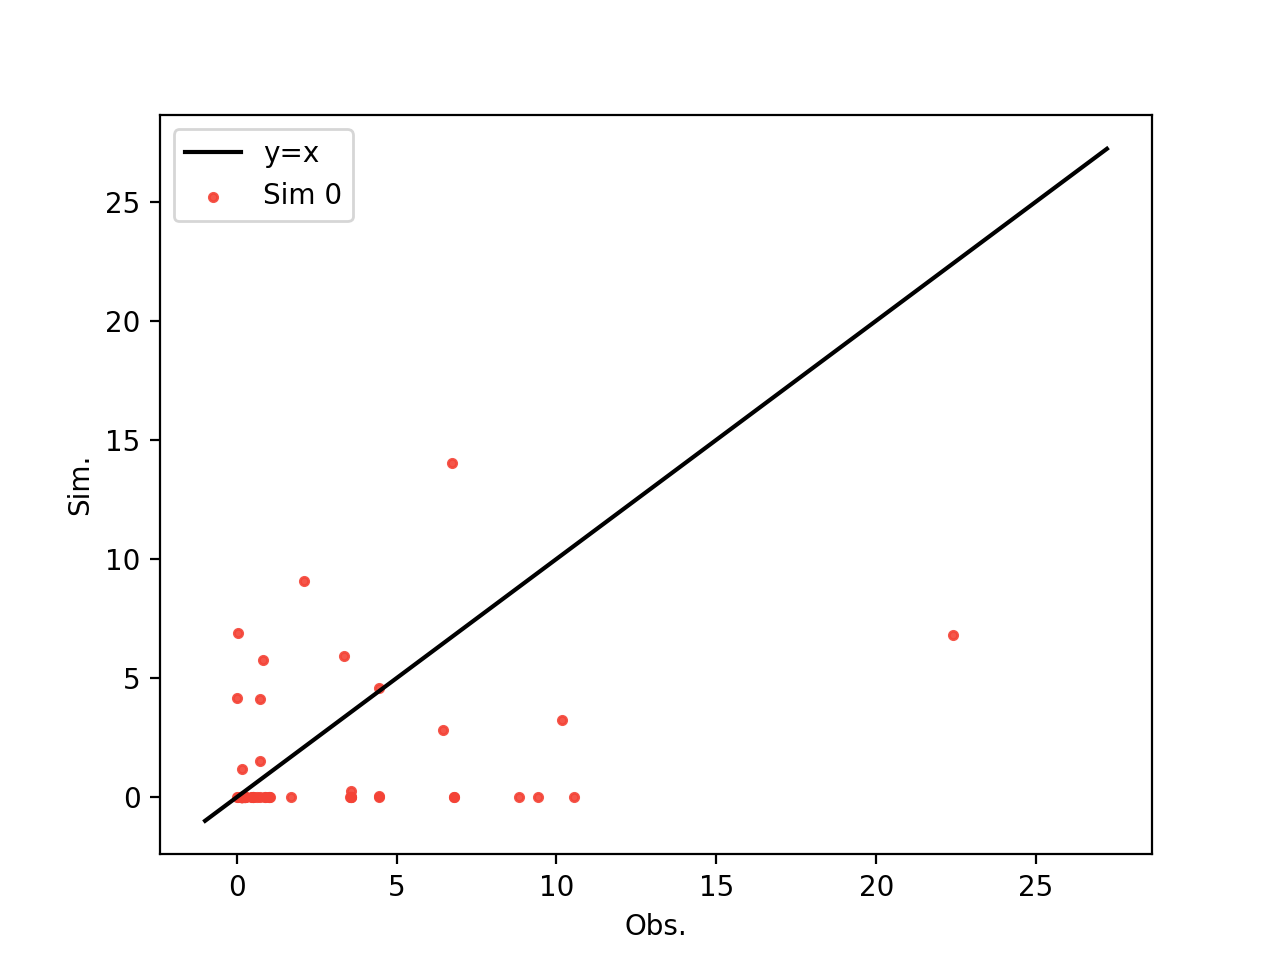

Text(0,0.5,'Sim.')

In [91]:
time = np.array(conc_merged['Jdays'])
obs = np.array(conc_merged['ug.L'])

x = np.arange(conc_merged['ug.L'].min()-1, 
              conc_merged['ug.L'].max()+5, 0.2) 
y = x
sims = []

for i in range(1, len(np.array(conc_merged.iloc[0, 1:]))):
    arr = np.array(conc_merged.iloc[:, i])
#     arr[arr > 0.99] = np.nan
    sims.append(arr)

fig = plt.figure()

ax1 = plt.subplot(111) 

ax1.plot(x, y, label='y=x', c= "black")
for i in range(len(sims)):
    ax1.scatter(obs, sims[i], c= palette[i], marker='.', # s=time,
                label="Sim "+ str(i), alpha=.9)
ax1.legend() 
ax1.set_xlabel("Obs.")
ax1.set_ylabel("Sim.")

<IPython.core.display.Javascript object>


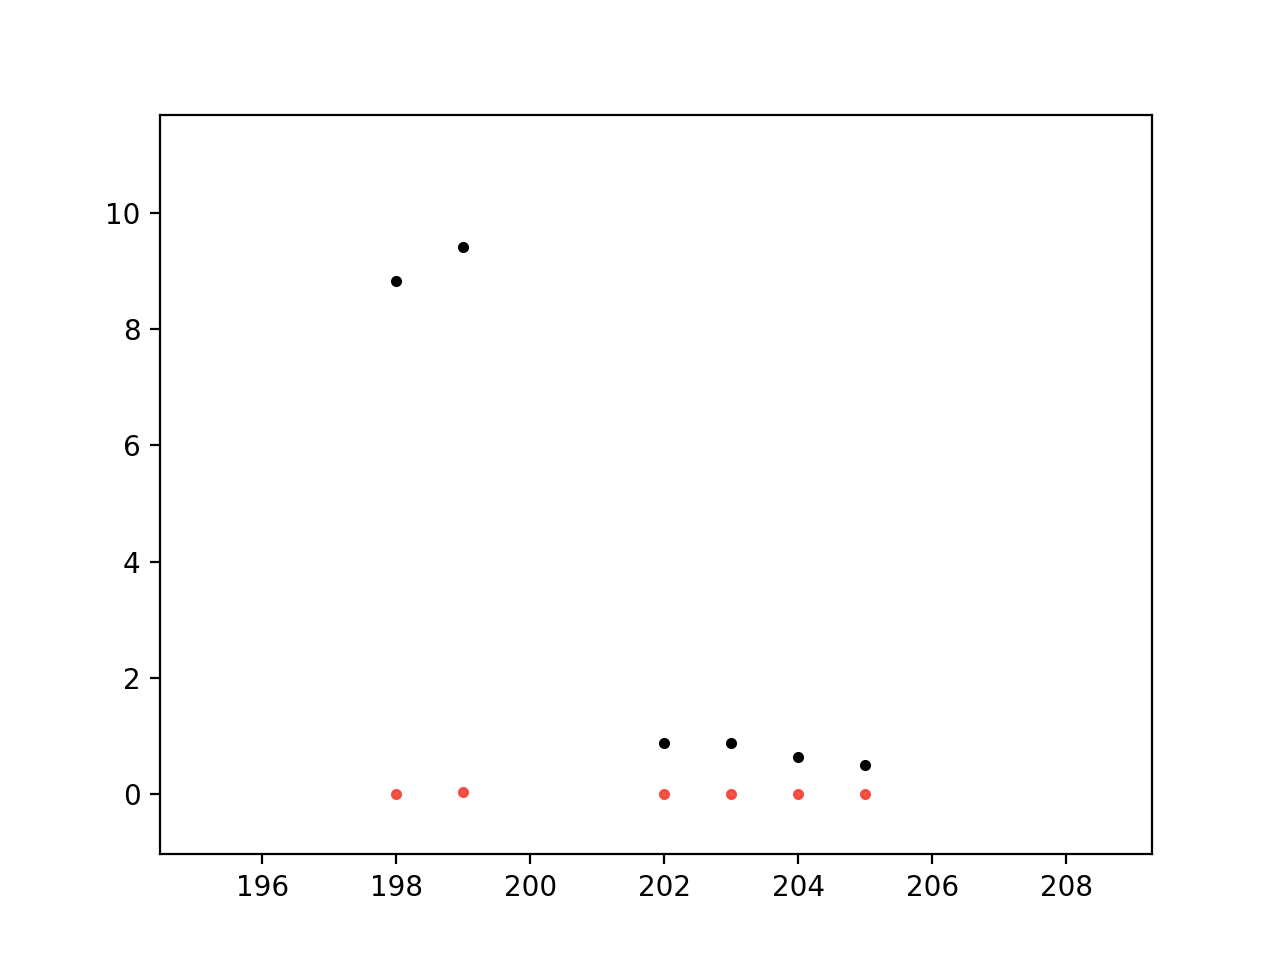

In [92]:
fig = plt.figure()

ax1 = plt.subplot(111) 

for i in range(len(sims)):
    ax1.scatter(time, sims[i], c= palette[i], marker='.', #s=time,
                label="Sim "+ str(i), alpha=.9)
ax1.scatter(time, obs, c= 'black', marker='.', # s=time,
                label="Obs")

In [77]:
np.log(2)/3000.

0.00023104906018664843

In [78]:
np.log(2)/30.

0.023104906018664842

In [79]:
time

array([178, 179, 180, 183, 189, 190, 198, 199, 202, 203, 204, 205, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 227, 228, 231, 232, 233, 234, 235, 238, 239, 240, 241, 242,
       245, 246, 247, 252, 253, 254, 255, 256, 257, 258, 259, 260, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285])

In [94]:
7/4.
33/10.

3.3